<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/VHARDPermutation_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
df = df[df['y']>1000]
shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

X['m/n'] = X['m/n'].apply(lambda x: x*100000)
X['(m/n)^2'] = X['(m/n)^2'].apply(lambda x: x*100000)
X['(m/n)^3'] = X['(m/n)^3'].apply(lambda x: x*100000)
shuffled = shuffled.drop(['CPLEXStatus', 'index'], axis = 1)
print(X.head())

   subtype  class  indeks    n   m   n/m  (n/m)^2   (n/m)^3      m/n  (m/n)^2  \
0       14      5       2   88   8  11.0   121.00  1331.000   9090.9    826.4   
1       13      4       9  100  10  10.0   100.00  1000.000  10000.0   1000.0   
2       13      5       6  180  18  10.0   100.00  1000.000  10000.0   1000.0   
3        9      7       4  198  44   4.5    20.25    91.125  22222.2   4938.3   
4        8      7       2  100  25   4.0    16.00    64.000  25000.0   6250.0   

   (m/n)^3   av.length     std.dev  median  range  min   max    k  
0     75.1  109.215912   48.079784   112.5    193    9   202   72  
1    100.0  100.610001   22.366051   105.5    104   46   150   58  
2    100.0   99.588890   46.460861   102.5    245    2   247  111  
3   1097.4  772.813110  202.429962   785.5    995  225  1220  181  
4   1562.5  408.950012   88.360634   425.0    377  201   578   85  


In [2]:
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [3]:
from sklearn.metrics import mean_squared_error

rmse_full_mod = mean_squared_error(regr.predict(X_test), y_test, squared = False)

results = []

X = pd.DataFrame(X, columns=select)
X_test = pd.DataFrame(X_test, columns=X.columns)

for predictor in X_test:
    #print(predictor)
    X_test_copy = X_test.copy()
    #X_test_copy = X_test_copy.astype('int')
    
    X_test_copy[predictor] = X_test[predictor].sample(frac=1).values
    
    new_rmse = mean_squared_error(regr.predict(X_test_copy), y_test, squared = False)
    
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })

resultsdf = pd.DataFrame(results).sort_values(by = 'score', ascending = False)
resultsdf



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

,pred,score
17,k,7367.386336
12,std.dev,5859.388085
11,av.length,3978.893495
3,n,3594.809249
13,median,3010.295989
7,(n/m)^3,1811.716446
8,m/n,1519.946472
14,range,1315.028230
9,(m/n)^2,1100.871180
0,subtype,1038.561160


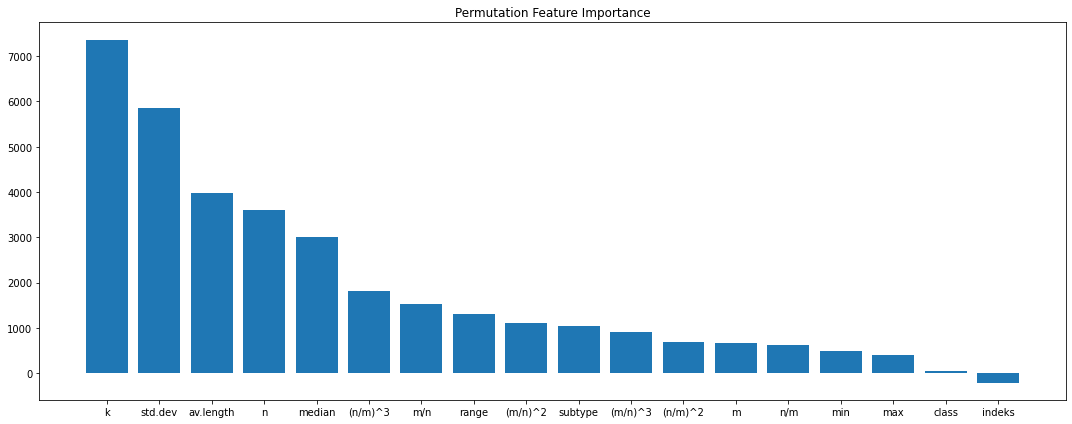

In [4]:
plt.figure(figsize=(15, 6))
plt.title('Permutation Feature Importance')
plt.bar(resultsdf.pred, resultsdf.score)
plt.tight_layout()
plt.show()